# Classification

## DATASET preparation

### Step 01 : importing libraries

In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 7.4 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from xgboost import XGBClassifier
from catboost import CatBoostClassifier

import seaborn as sn

### Step 02 : Loading data

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path ="Modified_ObesityDataset_.csv"
df = pd.read_csv(path)

### Step 03 : split the data into X ( features ) and y (Target)

In [ ]:
X = df.drop('NObeyesdad', axis=1)
y = df['NObeyesdad']

### Step 04 : split the data into training and testing sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## Model 01 : XGBClassifier

Step 01 : Training the model

In [ ]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
print('Train score :', xgb_model.score(X_train, y_train))

Train score : 1.0


Step 02 : Validation

In [ ]:
cross_val_score(xgb_model, X_train, y_train, cv=5, scoring='accuracy').mean()

0.9673630808255507

In [ ]:
xgb_model.score(X_test, y_test)

0.9809782608695652

Step 03 : Evaluation with confusion matrix

In [ ]:
xgb_confusion_matrix = confusion_matrix(y_test, xgb_model.predict(X_test))

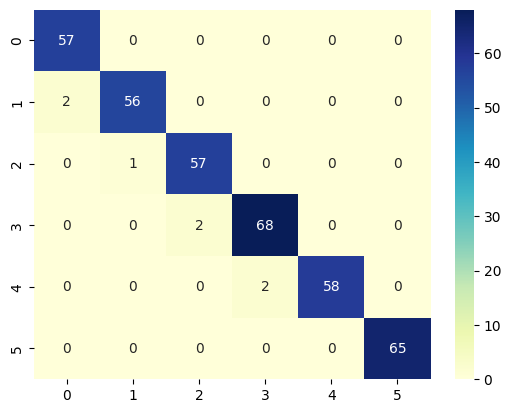

In [ ]:
sn.heatmap(xgb_confusion_matrix, cmap="YlGnBu", annot=True)
plt.show()

## Model 02 : CatBoostClassifier

In [ ]:
cat_model = CatBoostClassifier()
cat_model.fit(X_train, y_train)

Learning rate set to 0.0807
0:	learn: 1.6132025	total: 51.5ms	remaining: 51.4s
1:	learn: 1.4908760	total: 54.7ms	remaining: 27.3s
2:	learn: 1.3866308	total: 57.9ms	remaining: 19.2s
3:	learn: 1.2952770	total: 61.2ms	remaining: 15.2s
4:	learn: 1.2167840	total: 65.7ms	remaining: 13.1s
5:	learn: 1.1443787	total: 69.3ms	remaining: 11.5s
6:	learn: 1.0887633	total: 72.9ms	remaining: 10.3s
7:	learn: 1.0298004	total: 76.1ms	remaining: 9.44s
8:	learn: 0.9765223	total: 79.5ms	remaining: 8.75s
9:	learn: 0.9379836	total: 82.7ms	remaining: 8.19s
10:	learn: 0.8962478	total: 86.1ms	remaining: 7.74s
11:	learn: 0.8557976	total: 91.4ms	remaining: 7.53s
12:	learn: 0.8257673	total: 94.7ms	remaining: 7.19s
13:	learn: 0.7922932	total: 98ms	remaining: 6.9s
14:	learn: 0.7647766	total: 101ms	remaining: 6.66s
15:	learn: 0.7383319	total: 105ms	remaining: 6.45s
16:	learn: 0.7191086	total: 108ms	remaining: 6.24s
17:	learn: 0.6971990	total: 111ms	remaining: 6.06s
18:	learn: 0.6674880	total: 114ms	remaining: 5.9s
19:

In [ ]:
print('Train score :', cat_model.score(X_train, y_train))

Train score : 1.0


Step 02 : Validation

In [ ]:
cross_val_score(cat_model, X_train, y_train, cv=5, scoring='accuracy', verbose=0).mean()

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
4:	learn: 1.2401193	total: 77.5ms	remaining: 15.4s
5:	learn: 1.1743371	total: 91.1ms	remaining: 15.1s
6:	learn: 1.1155403	total: 105ms	remaining: 15s
7:	learn: 1.0590353	total: 114ms	remaining: 14.1s
8:	learn: 1.0140937	total: 130ms	remaining: 14.3s
9:	learn: 0.9752698	total: 146ms	remaining: 14.4s
10:	learn: 0.9330697	total: 157ms	remaining: 14.1s
11:	learn: 0.8930916	total: 176ms	remaining: 14.5s
12:	learn: 0.8567246	total: 189ms	remaining: 14.3s
13:	learn: 0.8109660	total: 202ms	remaining: 14.2s
14:	learn: 0.7846746	total: 211ms	remaining: 13.9s
15:	learn: 0.7587790	total: 222ms	remaining: 13.7s
16:	learn: 0.7397503	total: 235ms	remaining: 13.6s
17:	learn: 0.7151595	total: 250ms	remaining: 13.6s
18:	learn: 0.6842318	total: 272ms	remaining: 14s
19:	learn: 0.6594777	total: 289ms	remaining: 14.2s
20:	learn: 0.6417628	total: 303ms	remaining: 14.1s
21:	learn: 0.6269298	total: 321ms	remaining: 14.3s
22:	learn: 0

0.9700795572466274

In [ ]:
cat_model.score(X_test, y_test)

0.9646739130434783

Step 04 : Evaluation with confusion matrix

In [ ]:
cat_confusion_matrix = confusion_matrix(y_test, cat_model.predict(X_test))

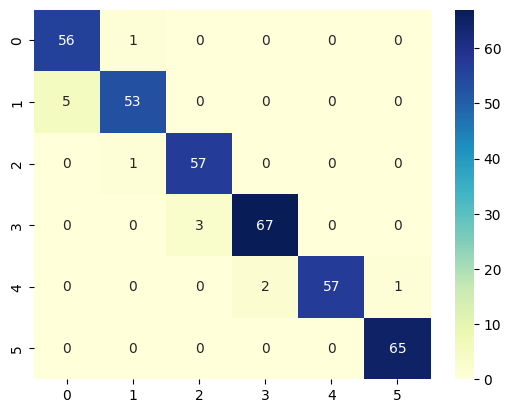

In [ ]:
sn.heatmap(cat_confusion_matrix, cmap="YlGnBu", annot=True)
plt.show()